<a href="https://colab.research.google.com/github/Worachet-Ch/project2022/blob/main/random_forest_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
from google.colab import drive #เชื่อม Google drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/project' #เข้า drive
data1 = pd.read_csv(os.path.join(path,'df_1.csv'))

Mounted at /content/drive


In [ ]:
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
data1.drop('Unnamed: 0',1,inplace = True)
data1

<ipython-input-3-f170cadba2e7>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data1.drop('Unnamed: 0',1,inplace = True)


,Sex,AgeSYear,Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,Fat Mass,...,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT,Alkaline Phos,HbA1c,telomere length (kb)
0,2.0,58.0,47.200000,156.000000,19.40,112.000,64.00,70.00,19.741,13.631,...,4.8,180.0,97.0,62.0,98.0,25.0,32.0,40.0,5.800000,7.30
1,2.0,57.0,47.400000,153.000000,20.20,114.000,75.00,69.00,19.300,12.500,...,5.0,176.0,51.0,72.0,94.0,16.0,16.0,62.0,5.100000,6.36
2,2.0,24.0,53.200000,157.000000,21.60,103.000,69.00,78.00,21.300,14.600,...,5.2,159.0,45.0,52.0,98.0,13.0,17.0,50.0,5.400000,9.71
3,2.0,62.0,54.400000,165.000000,20.00,95.000,75.00,83.00,21.600,15.200,...,4.1,230.0,94.0,61.0,151.0,18.0,31.0,76.0,5.600000,6.17
4,2.0,86.0,49.000000,154.000000,20.70,129.000,79.00,83.00,19.907,15.369,...,5.4,183.0,86.0,39.0,127.0,12.0,22.0,82.0,6.200000,4.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,2.0,25.0,47.000000,165.000000,17.30,104.000,63.00,89.00,20.387,12.852,...,4.8,232.0,36.0,96.0,128.0,18.0,12.0,46.0,5.393333,8.98
418,2.0,31.0,72.200000,168.000000,25.60,123.000,89.00,69.00,25.451,18.258,...,6.1,187.0,49.0,51.0,127.0,21.0,24.0,71.0,5.186667,8.23
419,2.0,32.0,54.500000,158.466667,21.68,113.160,71.83,72.30,22.707,21.599,...,5.1,222.0,58.0,79.0,132.0,17.0,10.0,34.0,5.486667,8.79
420,1.0,29.0,63.073333,168.866667,22.04,108.465,71.96,83.95,27.607,20.258,...,6.8,140.0,92.0,48.0,73.0,31.0,75.0,69.0,4.973333,8.93


# hyperparameter 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
def hyperparameter(data):
  y = data['telomere length (kb)']
  X = data.drop('telomere length (kb)',1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)
  param_grid = {
    'bootstrap': [True, False ],
    'max_leaf_nodes': [3,5,7,10],
    'max_features': ['auto','sqrt','log2'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [3,4,5],
    'n_estimators': [100,200, 300,500,700, 1000],'random_state':[216]
  }
  rf = RandomForestRegressor()
  grid_search = GridSearchCV(estimator=rf,
                            param_grid=param_grid)
  grid_search.fit(X_train, y_train)
  return grid_search.best_params_

# First Data

In [ ]:
scaler = MinMaxScaler()
Scaler = scaler.fit_transform(data1)

In [ ]:
df = pd.DataFrame(  Scaler, columns = ['Sex' , 'AgeSYear', 'telomere length (kb)','Weight','Height','BMI','Systolic','Diastolic','HeartRate','SMM','Fat Mass',
                                       '% Body fat','waist to hip radio','abdominal circumference','visceral fat area','Glucose','BUN','Creatinine','Uric Acid','Cholesterol',
                                       'Triglyceride','HDL-C','LDL','AST','ALT','Alkaline Phos','HbA1c'])

In [ ]:
df

,Sex,AgeSYear,telomere length (kb),Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,...,Creatinine,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT,Alkaline Phos,HbA1c
0,1.0,0.582090,0.154562,0.250000,0.198473,0.531707,0.333333,0.306452,0.101103,0.236189,...,0.424242,0.438849,0.211082,0.402299,0.350365,0.271186,0.376812,0.203390,0.540984,0.119472
1,1.0,0.567164,0.158287,0.181818,0.259542,0.551220,0.537037,0.290323,0.085409,0.208738,...,0.454545,0.410072,0.089710,0.517241,0.321168,0.118644,0.144928,0.389831,0.426230,0.083010
2,1.0,0.074627,0.266294,0.272727,0.366412,0.443902,0.425926,0.435484,0.156584,0.259709,...,0.484848,0.287770,0.073879,0.287356,0.350365,0.067797,0.159420,0.288136,0.475410,0.212956
3,1.0,0.641791,0.288641,0.454545,0.244275,0.365854,0.537037,0.516129,0.167260,0.274272,...,0.318182,0.798561,0.203166,0.390805,0.737226,0.152542,0.362319,0.508475,0.508197,0.075640
4,1.0,1.000000,0.188082,0.204545,0.297710,0.697561,0.611111,0.516129,0.107011,0.278374,...,0.515152,0.460432,0.182058,0.137931,0.562044,0.050847,0.231884,0.559322,0.606557,0.012801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,1.0,0.089552,0.150838,0.454545,0.038168,0.453659,0.314815,0.612903,0.124093,0.217282,...,0.424242,0.812950,0.050132,0.793103,0.569343,0.152542,0.086957,0.254237,0.474317,0.184639
418,1.0,0.179104,0.620112,0.522727,0.671756,0.639024,0.796296,0.290323,0.304306,0.348495,...,0.621212,0.489209,0.084433,0.275862,0.562044,0.203390,0.260870,0.466102,0.440437,0.155547
419,1.0,0.194030,0.290503,0.306061,0.372519,0.543024,0.478333,0.343548,0.206655,0.429587,...,0.469697,0.741007,0.108179,0.597701,0.598540,0.135593,0.057971,0.152542,0.489617,0.177269
420,0.0,0.149254,0.450155,0.542424,0.400000,0.497220,0.480741,0.531452,0.381032,0.397039,...,0.727273,0.151079,0.197889,0.241379,0.167883,0.372881,1.000000,0.449153,0.405464,0.182700


In [ ]:
y = df['telomere length (kb)']
X = df.drop('telomere length (kb)',1)

<ipython-input-7-2081a7e829a9>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('telomere length (kb)',1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rg = RandomForestRegressor(n_estimators=100,random_state=216)
rg.fit(X_train, y_train)

RandomForestRegressor(random_state=216)

In [ ]:
y_pred = rg.predict(X_test)
y_pred

array([0.26132216, 0.51208566, 0.48359404, 0.17851024, 0.57650652,
       0.21852886, 0.28686034, 0.41941527, 0.26776536, 0.44442582,
       0.05774674, 0.1575419 , 0.4451198 , 0.62219739, 0.38646182,
       0.57454376, 0.51323526, 0.35468901, 0.35153445, 0.26858473,
       0.38071136, 0.1501676 , 0.65821229, 0.1409311 , 0.498946  ,
       0.06905028, 0.20413408, 0.59132216, 0.15964618, 0.46414898,
       0.68692737, 0.25884544, 0.15176909, 0.16040968, 0.06534451,
       0.20461825, 0.21342644, 0.17433892, 0.16769088, 0.18020484,
       0.61912477, 0.40264804, 0.19374302, 0.1505959 , 0.25569832,
       0.60463687, 0.4858473 , 0.60608939, 0.44341775, 0.60243948,
       0.39796276, 0.40092613, 0.20901304, 0.38513966, 0.30490875,
       0.417054  , 0.30860335, 0.54035382, 0.27757914, 0.36961266,
       0.08264432, 0.27635009, 0.14253259, 0.32491124, 0.39603352,
       0.32456238, 0.33994786, 0.22577281, 0.26787709, 0.61083799,
       0.37943017, 0.28246555, 0.06271881, 0.44375419, 0.22156

In [ ]:
from sklearn import metrics
#Train
print('R2 Value Train:',metrics.r2_score(y_train, rg.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, rg.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, rg.predict(X_train)))

R2 Value Train: 0.9938228968572929
MSE Train: 0.00021761166203351252
MAE Train: 0.01007457262477737


In [ ]:
print('MAPE',mean_absolute_percentage_error(y_test, y_pred))

MAPE 0.09490404543888897


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.9256456654419815
MSE Test: 0.0022080970851593882
MAE Test: 0.027825114105232394


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


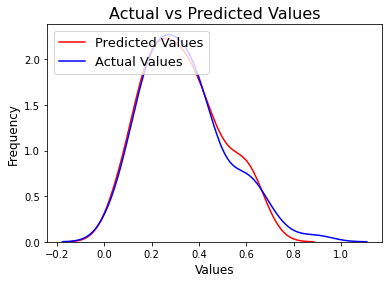

In [ ]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

## hyper

In [ ]:
hyperparameter(df)

<ipython-input-19-242c412fced5>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('telomere length (kb)',1)


{'bootstrap': True,
 'max_features': 'auto',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'n_estimators': 200,
 'random_state': 216}

### เซต 1

In [ ]:
y = df['telomere length (kb)']
X = df.drop('telomere length (kb)',1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)

<ipython-input-17-6fcfdf7c125b>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('telomere length (kb)',1)


In [ ]:
rg = RandomForestRegressor(n_estimators=200,max_features='auto',bootstrap= True,random_state=216,
                           max_leaf_nodes=10,min_samples_leaf=5,min_samples_split=3)
rg.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=10, min_samples_leaf=5,
                      min_samples_split=3, n_estimators=200, random_state=216)

In [ ]:
y_pred = rg.predict(X_test)
y_pred

array([0.26882742, 0.51504482, 0.50324614, 0.20703888, 0.56296584,
       0.23299556, 0.27963655, 0.41722363, 0.27587181, 0.44319924,
       0.10457093, 0.16433173, 0.45508507, 0.62421   , 0.35279917,
       0.56379396, 0.49557474, 0.37555466, 0.3470117 , 0.2397948 ,
       0.36937399, 0.16433173, 0.63860599, 0.14063657, 0.52055053,
       0.10701119, 0.21863449, 0.5818878 , 0.16219643, 0.49482196,
       0.65733159, 0.28391144, 0.17502856, 0.17502856, 0.11790689,
       0.22461829, 0.22762733, 0.18689665, 0.18328595, 0.17677465,
       0.62397505, 0.38504858, 0.19051864, 0.16618126, 0.2397948 ,
       0.61887656, 0.51690955, 0.57893473, 0.4695207 , 0.56934977,
       0.36509399, 0.38280436, 0.2188046 , 0.36553931, 0.30184612,
       0.39608665, 0.32403542, 0.53157877, 0.24385698, 0.35092912,
       0.13326212, 0.27500412, 0.14518883, 0.30707319, 0.41077275,
       0.32740228, 0.3906743 , 0.2212598 , 0.25841378, 0.60175219,
       0.38032227, 0.27920917, 0.10524156, 0.44325113, 0.23933

In [ ]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, rg.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, rg.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, rg.predict(X_train)))

R2 Value Train: 0.9531842042920493
MSE Train: 0.0016492622638908598
MAE Train: 0.02944540947550276


In [ ]:
print('MAPE',mean_absolute_percentage_error(y_test, y_pred))

MAPE 0.14031288926921984


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.8982038514409726
MSE Test: 0.0030230353112534166
MAE Test: 0.03573184496290986


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


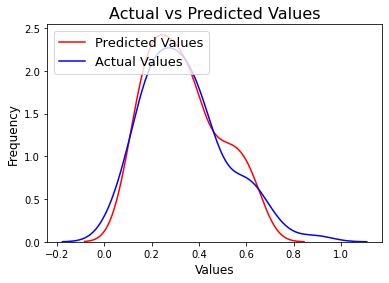

In [ ]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

### เซต 2

In [ ]:
y = df['telomere length (kb)']
X = df.drop('telomere length (kb)',1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)

<ipython-input-24-6fcfdf7c125b>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('telomere length (kb)',1)


In [ ]:
rg2 = RandomForestRegressor(n_estimators=300,max_features='auto',bootstrap= True,random_state=216,
                           max_leaf_nodes=10,min_samples_leaf=3,min_samples_split=3)
rg2.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=10, min_samples_leaf=3,
                      min_samples_split=3, n_estimators=300, random_state=216)

In [ ]:
y_pred = rg2.predict(X_test)
y_pred

array([0.26723851, 0.51174997, 0.50300771, 0.20583757, 0.55766211,
       0.23217819, 0.27825886, 0.41651784, 0.27600738, 0.44297512,
       0.10510627, 0.16397407, 0.45869656, 0.6264185 , 0.35312491,
       0.55742739, 0.49580571, 0.37838969, 0.34688367, 0.23949019,
       0.3702572 , 0.16397407, 0.63799458, 0.13878542, 0.51844861,
       0.10726759, 0.21774336, 0.57717853, 0.16188407, 0.49580786,
       0.6584002 , 0.28408765, 0.17454753, 0.17454753, 0.11633149,
       0.22357856, 0.22754529, 0.1866099 , 0.1822126 , 0.17565495,
       0.62633073, 0.38707835, 0.19158129, 0.16732283, 0.23949019,
       0.62029858, 0.51525849, 0.5755188 , 0.47255864, 0.57036958,
       0.36553999, 0.38403501, 0.21595387, 0.36655263, 0.30145651,
       0.39911006, 0.32148537, 0.53056293, 0.24286102, 0.35188876,
       0.13323804, 0.27337392, 0.14445824, 0.30834483, 0.41585465,
       0.32516451, 0.38732633, 0.22109523, 0.25725292, 0.60197752,
       0.38425662, 0.27829457, 0.10555335, 0.44811299, 0.23949

In [ ]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, rg2.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, rg2.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, rg2.predict(X_train)))

R2 Value Train: 0.9540104428330812
MSE Train: 0.0016201549075789655
MAE Train: 0.02926628919595091


In [ ]:
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

MAPE : 0.13978352745442507


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.8990449599601921
MSE Test: 0.002998056952148583
MAE Test: 0.03553923088037668


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


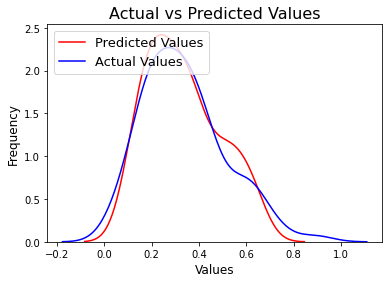

In [ ]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

### เซต 3

In [ ]:
y = df['telomere length (kb)']
X = df.drop('telomere length (kb)',1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)

<ipython-input-31-6fcfdf7c125b>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('telomere length (kb)',1)


In [ ]:
rg3 = RandomForestRegressor(n_estimators=500,max_features='auto',bootstrap= True,random_state=216,
                           max_leaf_nodes=10,min_samples_leaf=3,min_samples_split=3)
rg3.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=10, min_samples_leaf=3,
                      min_samples_split=3, n_estimators=500, random_state=216)

In [ ]:
y_pred = rg3.predict(X_test)
y_pred

array([0.26518614, 0.51246802, 0.49797181, 0.20762524, 0.55884468,
       0.230869  , 0.27915218, 0.41854762, 0.27469678, 0.44576561,
       0.10822554, 0.16318842, 0.45676001, 0.62701268, 0.35321032,
       0.55698079, 0.49541877, 0.37926074, 0.34697921, 0.24009341,
       0.36981559, 0.16318842, 0.6386544 , 0.13828593, 0.52094935,
       0.10839265, 0.21699001, 0.57626121, 0.16303464, 0.49783807,
       0.66214269, 0.28187477, 0.17637276, 0.17637276, 0.11669095,
       0.22263693, 0.22640245, 0.1879167 , 0.18177388, 0.17561535,
       0.62675384, 0.38461006, 0.19206544, 0.16707868, 0.24009341,
       0.62098898, 0.51338874, 0.57394724, 0.47130811, 0.57008436,
       0.36419285, 0.38266798, 0.21424011, 0.36657034, 0.29757558,
       0.3966154 , 0.32126426, 0.53242703, 0.24319342, 0.35246863,
       0.13517373, 0.27488673, 0.14453861, 0.30728781, 0.41139838,
       0.32456258, 0.38635283, 0.22156178, 0.25841026, 0.60155537,
       0.38241958, 0.2795367 , 0.10710451, 0.44568417, 0.23980

In [ ]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, rg2.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, rg2.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, rg2.predict(X_train)))

R2 Value Train: 0.9540104428330812
MSE Train: 0.0016201549075789655
MAE Train: 0.02926628919595091


In [ ]:
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

MAPE : 0.14051799027853562


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.899164404489574
MSE Test: 0.0029945098137237093
MAE Test: 0.035476704801440814


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


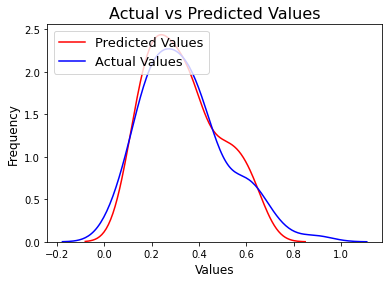

In [ ]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

# Second Data

In [ ]:
data2 = pd.read_csv(os.path.join(path,'df_2.csv'))
data2.drop('Unnamed: 0',1,inplace = True)

<ipython-input-38-9295e0cecbd9>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data2.drop('Unnamed: 0',1,inplace = True)


In [ ]:
data2

,Sex,AgeSYear,Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,Fat Mass,...,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT,Alkaline Phos,HbA1c,telomere length (kb)
0,2.0,58.0,47.200,156.00,19.40,112.000,64.00,70.00,19.694,13.404,...,4.8,180.0,97.0,62.0,98.0,25.0,32.0,40.0,5.800,7.30
1,2.0,57.0,47.400,153.00,20.20,114.000,75.00,69.00,19.300,12.500,...,5.0,176.0,51.0,72.0,94.0,16.0,16.0,62.0,5.100,6.36
2,2.0,24.0,53.200,157.00,21.60,103.000,69.00,78.00,21.300,14.600,...,5.2,159.0,45.0,52.0,98.0,13.0,17.0,50.0,5.400,9.71
3,2.0,62.0,54.400,165.00,20.00,95.000,75.00,83.00,21.600,15.200,...,4.1,230.0,94.0,61.0,151.0,18.0,31.0,76.0,5.600,6.17
4,2.0,86.0,49.000,154.00,20.70,129.000,79.00,83.00,20.057,16.295,...,5.4,183.0,86.0,39.0,127.0,12.0,22.0,82.0,6.200,4.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,2.0,25.0,47.000,165.00,17.30,104.000,63.00,89.00,20.299,13.578,...,4.8,232.0,36.0,96.0,128.0,18.0,12.0,46.0,5.316,8.98
418,2.0,31.0,72.200,168.00,25.60,123.000,89.00,69.00,25.286,18.181,...,6.1,187.0,49.0,51.0,127.0,21.0,24.0,71.0,5.215,8.23
419,2.0,32.0,65.656,156.96,25.98,115.860,73.17,74.72,23.573,24.765,...,5.1,222.0,58.0,79.0,132.0,17.0,10.0,34.0,5.542,8.79
420,1.0,29.0,67.768,169.90,23.87,117.205,75.50,85.37,29.753,16.638,...,6.8,140.0,92.0,48.0,73.0,31.0,75.0,69.0,5.725,8.93


In [ ]:
scaler = MinMaxScaler()
Scaler = scaler.fit_transform(data2)

In [ ]:
df2 = pd.DataFrame(  Scaler, columns = ['Sex' , 'AgeSYear', 'telomere length (kb)','Weight','Height','BMI','Systolic','Diastolic','HeartRate','SMM','Fat Mass',
                                       '% Body fat','waist to hip radio','abdominal circumference','visceral fat area','Glucose','BUN','Creatinine','Uric Acid','Cholesterol',
                                       'Triglyceride','HDL-C','LDL','AST','ALT','Alkaline Phos','HbA1c'])

In [ ]:
y = df2['telomere length (kb)']
X = df2.drop('telomere length (kb)',1)

<ipython-input-42-7d77ef194ec6>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df2.drop('telomere length (kb)',1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)
rg2 = RandomForestRegressor(n_estimators=100,random_state=216)
rg2.fit(X_train, y_train)

RandomForestRegressor(random_state=216)

In [ ]:
y_pred = rg2.predict(X_test)
y_pred

array([0.25052756, 0.50933724, 0.48076983, 0.19223464, 0.51199479,
       0.22636872, 0.28430168, 0.37636965, 0.26173799, 0.44046555,
       0.05404097, 0.15811918, 0.42422812, 0.63696462, 0.3825121 ,
       0.57987374, 0.50309125, 0.35929143, 0.35500745, 0.28001862,
       0.43046555, 0.15610801, 0.6743203 , 0.13217877, 0.50786834,
       0.06787709, 0.22713222, 0.57185493, 0.16884544, 0.424546  ,
       0.6861825 , 0.24672868, 0.15363128, 0.15884544, 0.04791434,
       0.18953445, 0.23052142, 0.1810987 , 0.21104283, 0.19532588,
       0.62221601, 0.40988026, 0.18871508, 0.15441341, 0.27247672,
       0.59243948, 0.50314115, 0.60323743, 0.42386704, 0.60573557,
       0.39761639, 0.38602142, 0.22942272, 0.37460764, 0.29905196,
       0.426854  , 0.28743017, 0.56214562, 0.30372439, 0.37673929,
       0.05722533, 0.28283054, 0.15607076, 0.35615158, 0.44229348,
       0.32162011, 0.31242086, 0.21947858, 0.25564246, 0.62484171,
       0.38767318, 0.28582868, 0.06977654, 0.44941359, 0.24115

In [ ]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, rg2.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, rg2.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, rg2.predict(X_train)))

R2 Value Train: 0.9947502914105977
MSE Train: 0.00018565820648243635
MAE Train: 0.009354076665064196


In [ ]:
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

MAPE : 0.09962468956065736


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.9320183714161192
MSE Test: 0.0020252836187450237
MAE Test: 0.027643001424033323


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


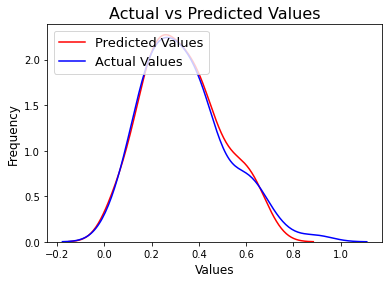

In [ ]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

### hyper

In [ ]:
hyperparameter(df2)

<ipython-input-25-242c412fced5>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('telomere length (kb)',1)


{'bootstrap': True,
 'max_features': 'auto',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 300,
 'random_state': 216}

### เซต 1

In [ ]:
y = df2['telomere length (kb)']
X = df2.drop('telomere length (kb)',1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)

<ipython-input-49-a509929240d5>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df2.drop('telomere length (kb)',1)


In [ ]:
rg = RandomForestRegressor(n_estimators=200,max_features='auto',bootstrap= True,random_state=216,
                           max_leaf_nodes=10,min_samples_leaf=5,min_samples_split=3)
rg.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=10, min_samples_leaf=5,
                      min_samples_split=3, n_estimators=200, random_state=216)

In [ ]:
y_pred = rg.predict(X_test)
y_pred

array([0.24506337, 0.50297312, 0.50501674, 0.19256583, 0.50855604,
       0.24366815, 0.27551874, 0.37249219, 0.243303  , 0.44151054,
       0.09840081, 0.15743455, 0.40597916, 0.62292113, 0.36962047,
       0.56965626, 0.48919873, 0.36287704, 0.36305952, 0.28430467,
       0.41637398, 0.15363107, 0.63128597, 0.14533159, 0.52934782,
       0.09807251, 0.23865601, 0.56494606, 0.17732571, 0.40853163,
       0.63819474, 0.2503616 , 0.18158188, 0.1822062 , 0.10136052,
       0.19100787, 0.24241019, 0.18468273, 0.23840319, 0.1851608 ,
       0.62327839, 0.41170588, 0.18578662, 0.1619846 , 0.27672722,
       0.58831467, 0.52234444, 0.55955583, 0.43847086, 0.57734965,
       0.37916686, 0.36332267, 0.2450696 , 0.35281389, 0.28195326,
       0.41368752, 0.27789999, 0.54552584, 0.31977302, 0.36731966,
       0.10841734, 0.27410482, 0.15916621, 0.3454428 , 0.42413107,
       0.3105459 , 0.35642553, 0.20471248, 0.25506636, 0.62225815,
       0.4203498 , 0.27642015, 0.09759558, 0.46819208, 0.24980

In [ ]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, rg2.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, rg2.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, rg2.predict(X_train)))

R2 Value Train: 0.9947502914105977
MSE Train: 0.00018565820648243635
MAE Train: 0.009354076665064196


In [ ]:
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

MAPE : 0.13457695458229266


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.8999874183725941
MSE Test: 0.0029795379642671943
MAE Test: 0.03550405181844548


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


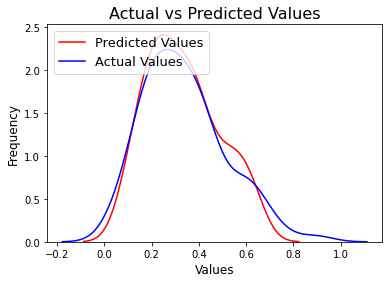

In [ ]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

### เซต 2

In [ ]:
y = df2['telomere length (kb)']
X = df2.drop('telomere length (kb)',1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)

<ipython-input-56-a509929240d5>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df2.drop('telomere length (kb)',1)


In [ ]:
rg2 = RandomForestRegressor(n_estimators=300,max_features='auto',bootstrap= True,random_state=216,
                           max_leaf_nodes=10,min_samples_leaf=3,min_samples_split=3)
rg2.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=10, min_samples_leaf=3,
                      min_samples_split=3, n_estimators=300, random_state=216)

In [ ]:
y_pred = rg2.predict(X_test)
y_pred

array([0.24354952, 0.50062182, 0.50193495, 0.19334349, 0.50872413,
       0.24164928, 0.27707705, 0.37276325, 0.24539253, 0.44051643,
       0.10084475, 0.15716064, 0.40981472, 0.62292814, 0.37018978,
       0.56566653, 0.4913775 , 0.36444753, 0.36462415, 0.28695   ,
       0.41817546, 0.15329271, 0.63330627, 0.1448138 , 0.52938564,
       0.09926938, 0.23600138, 0.56960508, 0.1770323 , 0.41569381,
       0.64174627, 0.25031397, 0.18154392, 0.18196013, 0.10263081,
       0.19063482, 0.24045216, 0.18518157, 0.23691372, 0.18433416,
       0.62316631, 0.41437153, 0.18550277, 0.15940526, 0.27873275,
       0.58920546, 0.52076166, 0.56560233, 0.4382802 , 0.57635957,
       0.38238786, 0.36422472, 0.24183218, 0.35273233, 0.28540921,
       0.41264695, 0.28009905, 0.54293553, 0.32000624, 0.3686559 ,
       0.1108566 , 0.27560684, 0.15684344, 0.34522612, 0.42075653,
       0.31383203, 0.3564983 , 0.20751277, 0.2561906 , 0.62309943,
       0.42109925, 0.27816805, 0.09852971, 0.46790771, 0.24786

In [ ]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, rg2.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, rg2.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, rg2.predict(X_train)))

R2 Value Train: 0.9607596424535803
MSE Train: 0.0013877521541871525
MAE Train: 0.02667245907008594


In [ ]:
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

MAPE : 0.13379075499153212


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.9010317995066304
MSE Test: 0.002948424146511559
MAE Test: 0.03490293986861444


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


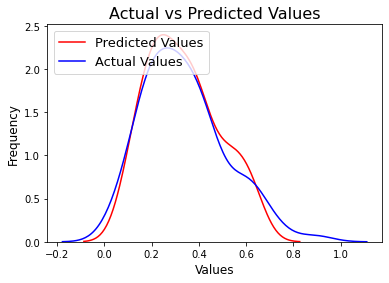

In [ ]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

### เซต 3

In [ ]:
y = df2['telomere length (kb)']
X = df2.drop('telomere length (kb)',1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)

<ipython-input-63-a509929240d5>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df2.drop('telomere length (kb)',1)


In [ ]:
rg3 = RandomForestRegressor(n_estimators=500,max_features='auto',bootstrap= True,random_state=216,
                           max_leaf_nodes=10,min_samples_leaf=3,min_samples_split=3)
rg3.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=10, min_samples_leaf=3,
                      min_samples_split=3, n_estimators=500, random_state=216)

In [ ]:
y_pred = rg3.predict(X_test)
y_pred

array([0.24102944, 0.50394408, 0.5031248 , 0.19258576, 0.51424773,
       0.24200131, 0.27598547, 0.37283213, 0.24714171, 0.44227399,
       0.10318237, 0.15607072, 0.40945067, 0.62520464, 0.37073589,
       0.56589424, 0.49090305, 0.36376127, 0.36568236, 0.28389975,
       0.41823137, 0.15321663, 0.63465592, 0.14580545, 0.53135157,
       0.10046594, 0.23744472, 0.56936863, 0.17747487, 0.41573037,
       0.643349  , 0.25192832, 0.18194991, 0.18242878, 0.10359516,
       0.1895542 , 0.24087934, 0.18537187, 0.2384137 , 0.18356222,
       0.62527081, 0.41364229, 0.18465961, 0.15984416, 0.27699057,
       0.58452   , 0.51797672, 0.56600591, 0.44435646, 0.57758816,
       0.3836909 , 0.36392234, 0.24277065, 0.3529245 , 0.28347345,
       0.41398359, 0.27944741, 0.54131705, 0.32030273, 0.36880127,
       0.11013481, 0.27455807, 0.15705993, 0.3466747 , 0.41843077,
       0.31219192, 0.35870925, 0.20585981, 0.25600367, 0.62563365,
       0.4197985 , 0.27693636, 0.09976254, 0.4639427 , 0.24916

In [ ]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, rg2.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, rg2.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, rg2.predict(X_train)))

R2 Value Train: 0.9607596424535803
MSE Train: 0.0013877521541871525
MAE Train: 0.02667245907008594


In [ ]:
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

MAPE : 0.13597011438459758


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.9015171320012253
MSE Test: 0.0029339652997404076
MAE Test: 0.03509556163144375


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


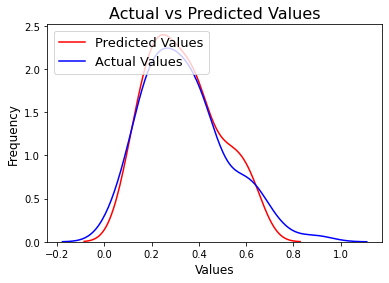

In [ ]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

# data control

In [ ]:
data_file_path = os.path.join(path,'data_notmissing.csv') #ไปที่ไฟล์ confirmed-cases-since-280265.csv
data3 = pd.read_csv(data_file_path)
data3.drop({'Unnamed: 0'},1,inplace = True)

<ipython-input-70-eab412fc4bad>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data3.drop({'Unnamed: 0'},1,inplace = True)


In [ ]:
scaler = MinMaxScaler()
Scaler = scaler.fit_transform(data3)

In [ ]:
df3 = pd.DataFrame(Scaler, columns = ['Sex' , 'AgeSYear', 'telomere length (kb)','Weight','Height','BMI','Systolic','Diastolic','HeartRate','SMM','Fat Mass',
                                       '% Body fat','waist to hip radio','abdominal circumference','visceral fat area','Glucose','BUN','Creatinine','Uric Acid','Cholesterol',
                                       'Triglyceride','HDL-C','LDL','AST','ALT','Alkaline Phos','HbA1c'])

In [ ]:
df3

,Sex,AgeSYear,telomere length (kb),Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,...,Creatinine,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT,Alkaline Phos,HbA1c
0,1.0,0.660714,0.275862,0.127413,0.181818,0.284483,0.444444,0.621622,0.310345,0.085409,...,0.6,0.517241,0.409091,0.132296,0.740741,0.290909,0.118644,0.000000,0.582278,0.426230
1,1.0,0.071429,0.720159,0.239382,0.272727,0.405172,0.269841,0.459459,0.465517,0.156584,...,0.4,0.551724,0.280303,0.108949,0.370370,0.327273,0.067797,0.032258,0.430380,0.475410
2,1.0,0.750000,0.250663,0.262548,0.454545,0.267241,0.142857,0.621622,0.551724,0.167260,...,0.3,0.362069,0.818182,0.299611,0.537037,0.809091,0.152542,0.483871,0.759494,0.508197
3,1.0,0.267857,0.391247,0.299228,0.363636,0.413793,0.142857,0.135135,0.362069,0.199288,...,0.2,0.517241,0.575758,0.116732,0.666667,0.527273,0.118644,0.129032,0.240506,0.426230
4,0.0,0.464286,0.297082,0.608108,0.568182,0.698276,0.746032,0.675676,0.965517,0.437722,...,0.5,0.844828,0.545455,0.178988,0.518519,0.545455,0.101695,0.096774,0.670886,0.442623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.0,0.714286,0.202918,0.602317,0.568182,0.689655,0.714286,0.594595,0.310345,0.483986,...,0.5,0.844828,0.454545,0.630350,0.129630,0.409091,0.457627,0.483871,0.797468,0.655738
149,0.0,0.678571,0.102122,0.409266,0.522727,0.439655,0.269841,0.648649,0.362069,0.387900,...,0.6,0.827586,0.522727,0.175097,0.277778,0.636364,0.118644,0.548387,0.329114,0.704918
150,1.0,0.392857,0.689655,0.283784,0.454545,0.301724,0.253968,0.000000,0.448276,0.213523,...,0.4,0.465517,0.681818,0.198444,0.574074,0.663636,0.033898,0.000000,0.215190,0.377049
151,1.0,0.732143,0.236074,0.405405,0.318182,0.646552,0.492063,0.216216,0.362069,0.231317,...,0.4,0.534483,0.856061,0.190661,0.444444,0.945455,0.101695,0.225806,0.354430,0.475410


In [ ]:
y = df3['telomere length (kb)']
X = df3.drop('telomere length (kb)',1)

<ipython-input-74-2db422769c5c>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df3.drop('telomere length (kb)',1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)
rg3 = RandomForestRegressor(n_estimators=100,random_state=216)
rg3.fit(X_train, y_train)

RandomForestRegressor(random_state=216)

In [ ]:
y_pred = rg3.predict(X_test)
y_pred

array([0.68344828, 0.43309019, 0.65435013, 0.59931034, 0.71168435,
       0.37633952, 0.68412467, 0.56470822, 0.74220159, 0.578687  ,
       0.52883289, 0.19453581, 0.67189655, 0.29115385, 0.18515915,
       0.47624668, 0.28596817, 0.74903183, 0.69082228, 0.67240053,
       0.40311671, 0.53047745, 0.22137931, 0.74319629, 0.53001326,
       0.51246684, 0.66314324, 0.57952255, 0.73526525, 0.42895225,
       0.28721485])

In [ ]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, rg3.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, rg3.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, rg3.predict(X_train)))

R2 Value Train: 0.9533327172486143
MSE Train: 0.00161569842923809
MAE Train: 0.03227464451885032


In [ ]:
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

MAPE : 0.2885982939026689


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.7485633923869319
MSE Test: 0.01580150098195666
MAE Test: 0.10339907589629507


### เซต 1

In [ ]:
y = df3['telomere length (kb)']
X = df3.drop('telomere length (kb)',1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)

<ipython-input-80-6b97428e46c0>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df3.drop('telomere length (kb)',1)


In [ ]:
rg = RandomForestRegressor(n_estimators=200,max_features='auto',bootstrap= True,random_state=216,
                           max_leaf_nodes=10,min_samples_leaf=5,min_samples_split=3)
rg.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=10, min_samples_leaf=5,
                      min_samples_split=3, n_estimators=200, random_state=216)

In [ ]:
y_pred = rg.predict(X_test)
y_pred

array([0.66967717, 0.43839958, 0.65670642, 0.61397477, 0.69310591,
       0.39791752, 0.66091455, 0.57588309, 0.71478642, 0.57536575,
       0.55928573, 0.18809152, 0.68881342, 0.29909143, 0.18037854,
       0.47676221, 0.27810777, 0.73272027, 0.67640889, 0.65672104,
       0.40551183, 0.53001871, 0.19082851, 0.71395914, 0.54971373,
       0.52560037, 0.64716011, 0.58205299, 0.72413103, 0.4383529 ,
       0.28183911])

In [ ]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, rg3.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, rg3.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, rg3.predict(X_train)))

R2 Value Train: 0.9533327172486143
MSE Train: 0.00161569842923809
MAE Train: 0.03227464451885032


In [ ]:
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

MAPE : 0.2894837945558332


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.736438235152564
MSE Test: 0.016563504915131286
MAE Test: 0.10523196833613378


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


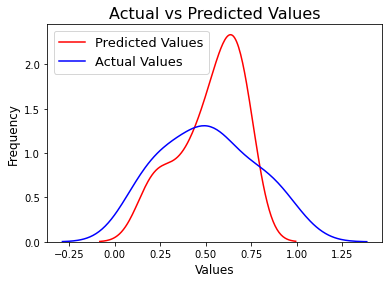

In [ ]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

### เซต 2

In [ ]:
y = df3['telomere length (kb)']
X = df3.drop('telomere length (kb)',1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)

<ipython-input-87-6b97428e46c0>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df3.drop('telomere length (kb)',1)


In [ ]:
rg2 = RandomForestRegressor(n_estimators=300,max_features='auto',bootstrap= True,random_state=216,
                           max_leaf_nodes=10,min_samples_leaf=3,min_samples_split=3)
rg2.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=10, min_samples_leaf=3,
                      min_samples_split=3, n_estimators=300, random_state=216)

In [ ]:
y_pred = rg2.predict(X_test)
y_pred

array([0.67913944, 0.44629634, 0.648476  , 0.61585071, 0.68485314,
       0.39980234, 0.65250888, 0.57586717, 0.71782466, 0.57860377,
       0.55461026, 0.16252314, 0.68872469, 0.30016214, 0.15960648,
       0.47395051, 0.28950283, 0.72996102, 0.671552  , 0.65999782,
       0.407946  , 0.53409798, 0.18804009, 0.71364632, 0.54607926,
       0.5241237 , 0.65736326, 0.57743724, 0.72124923, 0.44070601,
       0.29016531])

In [ ]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, rg3.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, rg3.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, rg3.predict(X_train)))

R2 Value Train: 0.9533327172486143
MSE Train: 0.00161569842923809
MAE Train: 0.03227464451885032


In [ ]:
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

MAPE : 0.29408792341122


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.7291536195673689
MSE Test: 0.01702130563641598
MAE Test: 0.10810428673720317


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


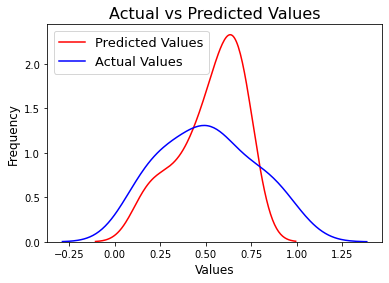

In [ ]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

### hyper

In [ ]:
hyperparameter(df3)

<ipython-input-25-242c412fced5>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('telomere length (kb)',1)


{'bootstrap': True,
 'max_features': 'auto',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 500,
 'random_state': 216}

### เซต 3

In [ ]:
y = df3['telomere length (kb)']
X = df3.drop('telomere length (kb)',1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)

<ipython-input-94-6b97428e46c0>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df3.drop('telomere length (kb)',1)


In [ ]:
rg3 = RandomForestRegressor(n_estimators=500,max_features='auto',bootstrap= True,random_state=216,
                           max_leaf_nodes=10,min_samples_leaf=3,min_samples_split=3)
rg3.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=10, min_samples_leaf=3,
                      min_samples_split=3, n_estimators=500, random_state=216)

In [ ]:
y_pred = rg3.predict(X_test)
y_pred

array([0.67715836, 0.44707582, 0.64034733, 0.61181145, 0.68818721,
       0.40466693, 0.65467383, 0.57514115, 0.71407612, 0.58055917,
       0.55746612, 0.15639474, 0.68819368, 0.30331026, 0.15500941,
       0.475418  , 0.28514571, 0.72817678, 0.67253086, 0.65811118,
       0.41162914, 0.53182255, 0.18385401, 0.71330754, 0.54845824,
       0.52351121, 0.66002257, 0.57965779, 0.72038298, 0.43673713,
       0.28582128])

In [ ]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, rg3.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, rg3.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, rg3.predict(X_train)))

R2 Value Train: 0.872014269180142
MSE Train: 0.004431077449959176
MAE Train: 0.052211379274648646


In [ ]:
print('MAPE :',mean_absolute_percentage_error(y_test, y_pred))

MAPE : 0.29277316307536383


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.7302616378240043
MSE Test: 0.016951672372841273
MAE Test: 0.10808358218370427


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


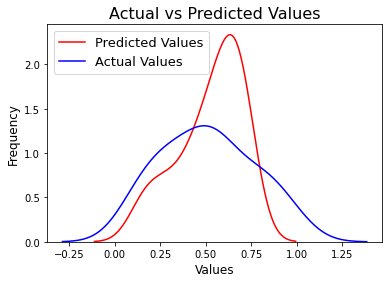

In [ ]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)